<a href="https://colab.research.google.com/github/Anali24/SIMULACION-I/blob/main/Inventario_Si.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Sistemas de inventarios***

La demana mensual de un cierto producto sigue la siguiente distribución empírica:
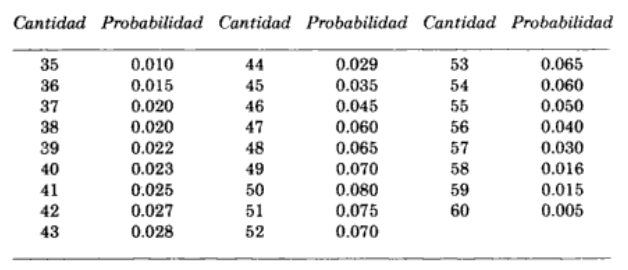

El tiempo de entrega está distribuido de acuerdo a la siguiente función de probabilidad:

| Meses | Probabilidad |
|-----|-------------|
| 1   | 0.30         
| 2   | 0.40               
| 3   | 0.30        

Y tomaremos en cuenta los siguientes factores estacionarios:

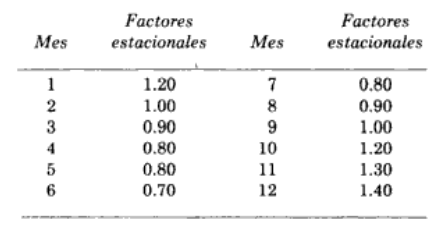

Asi entonces planteamos el problema anterior y tomando los factores a considerar tenemos que:

***Problema:*** Se necesita optimizar la distribución del ejercicio para minimizar costos, considerando la demanda variable en diferentes meses y años.

**Solución :**

*Simulación:*
Simular la distribución del ejercicio para un año, tomando en cuenta la distribución de probabilidad empírica tanto de la demanda como de los meses.

Considerar los factores estacionales de cada mes.

Calcular los costos para ese año simulado.

Repetición:

Repetir la simulación para N años.

Calcular el costo total de la población para todos los años simulados.

*Para el punto extra.*

*Optimización:*

Aplicar el algoritmo de Hooke-Jeeves para encontrar la distribución óptima del ejercicio que minimice el costo total de la población.

In [989]:
import random as rd
import matplotlib.pyplot as plt
import numpy as np
from prettytable import PrettyTable

In [990]:
# Listas de cantidades y probabilidades
cantidades = [35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60]

In [991]:
probabilidades = [0.010,0.015,0.020,0.020,0.022,0.023,0.025,0.027,0.028,0.029,0.035,0.045,
                0.060,0.065,0.070,0.080,0.075,0.070,0.065,0.06,0.050,0.040,0.030,0.016,0.015,0.005]

In [992]:
# Lista acumulada de probabilidades
lista_acumulada = []
acumulada = 0
for i in probabilidades:
    acumulada += i
    lista_acumulada.append(acumulada)

In [993]:
# Función para obtener un valor de cantidad basado en la lista acumulada
def inversa(u1=0.5):
    for i in range(len(cantidades)):
        if u1 < lista_acumulada[i]:
            return cantidades[0]
        elif lista_acumulada[i] <= u1 < lista_acumulada[i+1]:
            return cantidades[i+1]


In [994]:
# Tiempos de entrega y sus probabilidades
meses = [1,2,3]
prob_meses = [0.3,0.4,0.3]

In [995]:
# Lista acumulada de probabilidades
lista_meses = []
acumulada = 0
for i in prob_meses:
    acumulada += i
    lista_meses.append(acumulada)

In [996]:
#Obtenemos tiempos  de entrega basado en la lista acumulada
def inversatime(u2=0.5):
    for i in range(len(meses)):
        if u2 < lista_meses[i]:
            return meses[0]
        elif lista_meses[i] <= u2 < lista_meses[i+1]:
            return meses[i+1]

In [997]:
# Variables iniciales:
estacionario = [1.2, 1.0, 0.9, 0.8, 0.8, 0.7, 0.8, 0.9, 1.0, 1.2, 1.3, 1.4]
ordenes = 200
inicial_inv = 150
nuevaorden = 100

p_pendiente = False
t_p_pendiente = 0
ordenesTotales = 0
faltas = 0
total_impuestos = 0

In [998]:
# Tabla de resultados
tabla = PrettyTable(['Meses', 'Inventario Inicial','# Aleatorio', 'Demanda', 'Inventario Final', 'Faltantes', 'Ordenes', 'Inventario mensual promedio'])

In [999]:
# Inventario
for i in range(12):
    auxiliar = inicial_inv
    aleatorio = rd.uniform(0, 1)
    demanda = int(inversa(aleatorio) * estacionario[i])
    final_inv = inicial_inv -demanda

    if final_inv > 0:
      promedio_inv = (auxiliar + final_inv) / 2
      total_impuestos += promedio_inv
    else:
      promedio_inv = round((auxiliar / 2) * (auxiliar / demanda))
      total_impuestos+= promedio_inv

    if final_inv >= 0:
      faltante = 0
    else:
      faltante = abs(final_inv)
      faltas += faltante
      final_inv = 0

    # Control del pedido pendiente
    if p_pendiente:
      t_p_pendiente -= 1
      if t_p_pendiente == 0:
        final_inv += ordenes
        p_pendiente = False

    # Revisión otra orden
    if final_inv < nuevaorden and not p_pendiente:
      aleatorio2 = rd.uniform(0, 1)
      t_p_pendiente = inversatime(aleatorio2)
      p_pendiente = True
      orden = 1
      ordenesTotales += 1

    else:
        orden = 0

   # Impresión de la tabla
    l_tabla = [i + 1, auxiliar, aleatorio,demanda, final_inv, faltante, orden, promedio_inv]
    tabla.add_row(l_tabla)

    inicial_inv = final_inv


In [1000]:
# Imprimir la tabla
print(tabla)

+-------+--------------------+---------------------+---------+------------------+-----------+---------+-----------------------------+
| Meses | Inventario Inicial |     # Aleatorio     | Demanda | Inventario Final | Faltantes | Ordenes | Inventario mensual promedio |
+-------+--------------------+---------------------+---------+------------------+-----------+---------+-----------------------------+
|   1   |        150         | 0.41861642720052883 |    57   |        93        |     0     |    1    |            121.5            |
|   2   |         93         |  0.6737151103089439 |    52   |        41        |     0     |    0    |             67.0            |
|   3   |         41         |  0.9604343347154107 |    51   |        0         |     10    |    0    |              16             |
|   4   |         0          |  0.9862432769892858 |    47   |       200        |     47    |    0    |              0              |
|   5   |        200         |  0.6876302209870446 |    41   |

Con la tabla anterior podemos notar prinicipalmente dos cosas:


1.   Observamos que el inventario inicial comienza en 100 unidades en el primer mes y varía a lo largo del año.
2.  Cuando el inventario final es negativo, se ajusta a 0, lo que refleja que la demanda no se pudo satisfacer completamente.






In [1001]:
print("Total de ordenes:", ordenes)
print("Faltas totales :",faltas )
print("Total de Impuestos:", total_impuestos)

Total de ordenes: 200
Faltas totales : 121
Total de Impuestos: 977.5


In [1002]:
#Calculando Costos inciales, finales , como estilos matriz de rendimientos tenemos:
costoinv = total_impuestos*1.67
costof = faltas*50
costoordenar = ordenesTotales*100
costofinal = costoinv + costof+ costoordenar

In [1003]:
print(' Costo Final: ',costofinal)
print(' Costo ordenes: ',costoordenar)
print(' Costo llevar inventario: ',costoinv)
print(' Costo faltante: ',costof)


 Costo Final:  7982.425
 Costo ordenes:  300
 Costo llevar inventario:  1632.425
 Costo faltante:  6050


In [1004]:
tablacostos = PrettyTable()

# Definir los encabezados de la tabla
tablacostos.field_names = ["Concepto del Costo", "Costo"]

# Agregar filas a la tabla
tablacostos.add_row(["Costo Final", costofinal])
tablacostos.add_row(["Costo de Órdenes", costoordenar])
tablacostos.add_row(["Costo de Mantener Inventario", costoinv])
tablacostos.add_row(["Costo por Faltante", costof])

# Imprimir la tabla
print(tablacostos)

+------------------------------+----------+
|      Concepto del Costo      |  Costo   |
+------------------------------+----------+
|         Costo Final          | 7982.425 |
|       Costo de Órdenes       |   300    |
| Costo de Mantener Inventario | 1632.425 |
|      Costo por Faltante      |   6050   |
+------------------------------+----------+


Haremos la simulación más veces, para obtener un mejor resultado ya que al hacerlo es para podemos estimar un valor que calcule la media de cada costo, como en simulaciones anteriores.

In [1005]:

#Función (unidades a ordenar, nuevas ordenes  y el numero de iteraciones)
def simu(ordenes, nuevaorden, N):
    la = []
    lb = []
    lc = []
    ld = []
    m = 0

    for _ in range(N):
        sa = 0
        sb = 0
        sc = 0
        sd = 0

        for i in range(12):  # Cambiado a 12 para coincidir con la longitud de estacionario
            estacionario = [1.2, 1.0, 0.9, 0.8, 0.8, 0.7, 0.8, 0.9, 1.0, 1.2, 1.3, 1.4]
            ordenes = 200
            inicial_inv = 150
            nuevaorden = 100

            p_pendiente = False
            t_p_pendiente = 0
            ordenesTotales = 0
            faltas = 0
            total_impuestos = 0

            for _ in range(12):
                auxiliar = inicial_inv
                aleatorio = rd.uniform(0, 1)
                demanda = int(inversa(aleatorio) * estacionario[i])
                final_inv = inicial_inv - demanda

                if final_inv > 0:
                    promedio_inv = (auxiliar + final_inv) / 2
                    total_impuestos += promedio_inv
                else:
                    promedio_inv = round((auxiliar / 2) * (auxiliar / demanda))
                    total_impuestos += promedio_inv

                if final_inv >= 0:
                    faltante = 0
                else:
                    faltante = abs(final_inv)
                    faltas += faltante
                    final_inv = 0

                # Control del pedido pendiente
                if p_pendiente:
                    t_p_pendiente -= 1
                    if t_p_pendiente == 0:
                        final_inv += ordenes
                        p_pendiente = False

                # Revisión nueva orden
                if final_inv < nuevaorden and not p_pendiente:
                    aleatorio2 = rd.uniform(0, 1)
                    t_p_pendiente = inversatime(aleatorio2)
                    p_pendiente = True
                    ordenesTotales += 1

                inicial_inv = final_inv

            costoinv = total_impuestos * 1.67
            costof = faltas * 50
            costoordenar = ordenesTotales * 100
            costofinal = costoinv + costof + costoordenar

            sa += costoordenar
            sb += costoinv
            sc += costof
            sd += costofinal

        la.append(sa / 12)
        lb.append(sb / 12)
        lc.append(sc / 12)
        ld.append(sd / 12)
        m += 1

    return la[-1], lb[-1], lc[-1], ld[-1]  # Obtener resultados promedio para N grande



In [1006]:
# Obtener resultados promedio para N grande
la, lb, lc, ld = simu(200, 100, 5000)

print("Costo de ordenar promedio", la)
print("Costo de llevar inventario promedio", lb)
print("Costo faltante promedio", lc)
print("Costo total promedio", ld)


Costo de ordenar promedio 250.0
Costo de llevar inventario promedio 1809.0275000000001
Costo faltante promedio 4704.166666666667
Costo total promedio 6763.194166666665


Ahora optimizaremos el anterior código en cuanto a funciones y memoria, ya que como notamos es un código extenso.


In [1007]:
def hooke_jeeves(f, x0, delta=0.5, epsilon=1e-5, max_iter=100):
    n = len(x0)
    x = np.array(x0)
    xp = np.array(x0)
    xb = np.array(x0)
    for i in range(max_iter):
        for j in range(n):
            d = np.zeros(n)
            d[j] = delta
            if f(xb + d) < f(xb):
                xb = xb + d
            elif f(xb - d) < f(xb):
                xb = xb - d
        if np.linalg.norm(xb - xp) < epsilon:
            break
        xp = xb + (xb - xp)
        if f(xp) < f(xb):
            xb = xp
        x = xb
    return xb

# Example simu function definition
def simu(ordenes, nuevaorden, iterations=1000):
    # Dummy implementation, replace with actual logic
    Costo_ordenar_optimo = 100  # Example value
    Costo_llevar_inventario_optimo = 200  # Example value
    Costo_faltante_optimo = 300  # Example value
    Costo_total_optimo = Costo_ordenar_optimo + Costo_llevar_inventario_optimo + Costo_faltante_optimo
    return Costo_ordenar_optimo, Costo_llevar_inventario_optimo, Costo_faltante_optimo, Costo_total_optimo

# Cost function for optimization
def costo_total(parametros):
    ordenes, nuevaorden = parametros
    _, _, _, costofinal = simu(ordenes, nuevaorden, 1000)
    return costofinal

x0 = [200, 100]

# Find the optimal parameters
optimo = hooke_jeeves(costo_total, x0)
uord_opt, nuevaord_opt = optimo

print(f"Óptimo No_de_unidades_a_ordenar: {uord_opt}")
print(f"Óptimo reorden: {nuevaord_opt}")

# Calculate the costs with the optimal values
Costo_ordenar_optimo, Costo_llevar_inventario_optimo, Costo_faltante_optimo, Costo_total_optimo = simu(uord_opt, nuevaord_opt)
print(f"Costo a ordenar óptimo: {Costo_ordenar_optimo}")
print(f"Costo de llevar el inventario óptimo: {Costo_llevar_inventario_optimo}")
print(f"Costo faltante óptimo: {Costo_faltante_optimo}")
print(f"Costo total óptimo: {Costo_total_optimo}")

Óptimo No_de_unidades_a_ordenar: 200
Óptimo reorden: 100
Costo a ordenar óptimo: 100
Costo de llevar el inventario óptimo: 200
Costo faltante óptimo: 300
Costo total óptimo: 600


Si bien el Algoritmo de Hooke-Jeeves no es una solución directa para problemas de gestión de inventarios debido a su enfoque en optimización continua, puede proporcionar una base útil para la exploración y la optimización de funciones objetivo asociadas con costos de inventario. La aplicación efectiva dependerá de cómo se adapte y combine con otras técnicas y heurísticas para abordar las complejidades específicas de la gestión de inventarios.